# Open Street Maps

## Basic Imports

In [1]:
%matplotlib inline

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import osmium

for module in [pd, gpd]:
    print(module.__name__, module.__version__)

pandas 1.2.4
geopandas 0.9.0


# OSMnx Street Network Analysis

## Load Lisbon

In [3]:
%%time
G = ox.graph_from_place('Lisbon', simplify=True)

CPU times: user 24.1 s, sys: 615 ms, total: 24.7 s
Wall time: 59.6 s


In [4]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [5]:
%%time
nodes, streets = ox.graph_to_gdfs(G, nodes=True, edges=True)

CPU times: user 2.44 s, sys: 25.2 ms, total: 2.47 s
Wall time: 2.51 s


In [6]:
print(f"Num nodes: {len(nodes)}, num edges: {len(streets)}")

Num nodes: 31453, num edges: 77395


In [7]:
nodes.head(5)

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
21270959,38.757318,-9.165944,3,NaN,NaN,POINT (-9.16594 38.75732)
21270962,38.758035,-9.161733,3,NaN,NaN,POINT (-9.16173 38.75804)
21270969,38.763211,-9.136542,3,NaN,NaN,POINT (-9.13654 38.76321)
21272087,38.747959,-9.188383,3,NaN,NaN,POINT (-9.18838 38.74796)
21272088,38.747807,-9.188400,3,NaN,NaN,POINT (-9.18840 38.74781)


In [8]:
streets.head(10)

osmid  oneway   lanes  \
u        v          key                                          
21270959 413210796  0                 22278074    True       3   
21270962 21270959   0    [22278074, 396719604]    True  [3, 4]   
21270969 2265747740 0                 22278381    True       4   
21272087 2688293048 0                396882454   False     NaN   
         21272088   0                396882454   False     NaN   
21272088 4001122643 0                  4515057    True     NaN   
         21272087   0                396882454   False     NaN   
         3997297372 0                396882454   False     NaN   
21424776 299498926  0                  4515071   False     NaN   
         2688293045 0                686463869    True     NaN   

                                                                name  \
u        v          key                                                
21270959 413210796  0    Avenida General Norton de Matos/2ª Circular   
21270962 21270959   0    Avenida General Norton de Matos/2ª Circular   
21270969 2265747740 0    Avenida Marechal Craveiro Lopes/2ª Circular   
21272087 2688293048 0              Rua Professor Reinaldo dos Santos   
         21272088   0              Rua Professor Reinaldo dos Santos   
21272088 4001122643 0                 Rua Manuel Ferreira de Andrade   
         21272087   0              Rua Professor Reinaldo dos Santos   
         3997297372 0              Rua Professor Reinaldo dos Santos   
21424776 299498926  0                               Rua Mariano Pina   
         2688293045 0                    Rotunda Pupilos do Exército   

                             highway maxspeed   length  \
u        v          key                                  
21270959 413210796  0          trunk       80   44.832   
21270962 21270959   0          trunk       80  375.295   
21270969 2265747740 0          trunk       80  269.025   
21272087 2688293048 0    residential      NaN   82.536   
         21272088   0    residential      NaN   16.908   
21272088 4001122643 0    residential      NaN   15.771   
         21272087   0    residential      NaN   16.908   
         3997297372 0    residential      NaN   37.308   
21424776 299498926  0    residential      NaN   47.492   
         2688293045 0    residential      NaN   18.056   

                                                                  geometry  \
u        v          key                                                      
21270959 413210796  0    LINESTRING (-9.16594 38.75732, -9.16646 38.75730)   
21270962 21270959   0    LINESTRING (-9.16173 38.75804, -9.16283 38.757...   
21270969 2265747740 0    LINESTRING (-9.13654 38.76321, -9.13828 38.763...   
21272087 2688293048 0    LINESTRING (-9.18838 38.74796, -9.18832 38.748...   
         21272088   0    LINESTRING (-9.18838 38.74796, -9.18840 38.747...   
21272088 4001122643 0    LINESTRING (-9.18840 38.74781, -9.18822 38.74779)   
         21272087   0    LINESTRING (-9.18840 38.74781, -9.18840 38.747...   
         3997297372 0    LINESTRING (-9.18840 38.74781, -9.18842 38.747...   
21424776 299498926  0    LINESTRING (-9.18809 38.74880, -9.18754 38.74877)   
         2688293045 0    LINESTRING (-9.18809 38.74880, -9.18809 38.748...   

                           junction bridge  ref access width tunnel service  \
u        v          key                                                       
21270959 413210796  0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21270962 21270959   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21270969 2265747740 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21272087 2688293048 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         21272088   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21272088 4001122643 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         21272087   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         3997297372 0           NaN   

In [9]:
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
%%time
G_projected = ox.project_graph(G)

CPU times: user 7.95 s, sys: 64.2 ms, total: 8.01 s
Wall time: 8.14 s


In [11]:
%%time
nodes_proj, streets_proj = ox.graph_to_gdfs(
    G_projected, nodes=True, edges=True)

CPU times: user 722 ms, sys: 4.74 ms, total: 727 ms
Wall time: 734 ms


In [12]:
streets_proj.crs

<Projected CRS: +proj=utm +zone=29 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

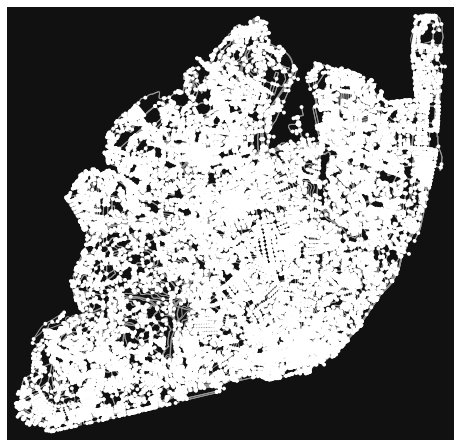

In [13]:
fig, ax = ox.plot_graph(G_projected)

### Other plotting method

In [14]:
import osmnx as ox
city = ox.geocode_to_gdf('Lisbon, Portugal')

<AxesSubplot:>

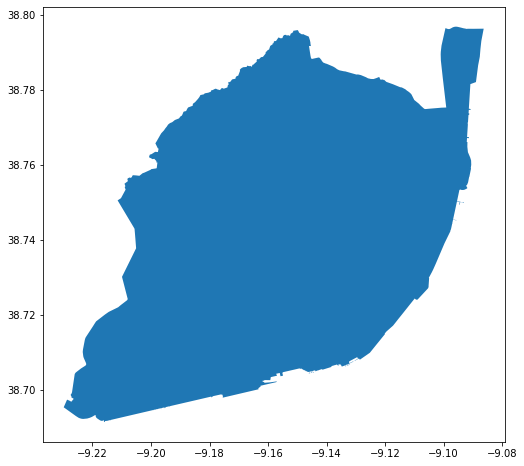

In [15]:
fig, ax = plt.subplots(figsize = (12,8))

city.plot(ax = ax)

In [16]:
streets.plot(ax = ax)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

## Calculate Basic Stats

In [17]:
%%time
# Get the Convex Hull of the network
convex_hull = streets_proj.unary_union.convex_hull
# Show output
convex_hull

# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(G_projected, area=area)
stats

CPU times: user 6min 38s, sys: 5.13 s, total: 6min 43s
Wall time: 6min 47s


{'n': 31453,
 'm': 77395,
 'k_avg': 4.921311162687184,
 'intersection_count': 27340,
 'streets_per_node_avg': 2.9545671319111055,
 'streets_per_node_counts': {0: 0,
  1: 4113,
  2: 202,
  3: 20483,
  4: 6354,
  5: 263,
  6: 36,
  7: 0,
  8: 1,
  9: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1307665405525705,
  2: 0.006422280863510635,
  3: 0.6512256382539027,
  4: 0.20201570597399293,
  5: 0.00836168251041236,
  6: 0.001144564906368232,
  7: 0.0,
  8: 3.179346962133978e-05,
  9: 3.179346962133978e-05},
 'edge_length_total': 4058229.890000049,
 'edge_length_avg': 52.435298016668376,
 'street_length_total': 2483831.1300000013,
 'street_length_avg': 53.485887508344305,
 'street_segments_count': 46439,
 'node_density_km': 329.0784985338912,
 'intersection_density_km': 286.0460417103801,
 'edge_density_km': 42459.4219599585,
 'street_density_km': 25987.20054914122,
 'circuity_avg': 1.364063595583124e-05,
 'self_loop_proportion': 0.004212158408165902,
 'clean_intersection_count': No

## Extended Stats

In [ ]:
%%time
extended_stats = ox.extended_stats(G_projected, ecc=True, cc=True)
series = pd.Series(extended_stats)
series

## Visualize Stats

In [ ]:
stats_columns = [
    'avg_neighbor_degree', 
    'degree_centrality', 
    'clustering_coefficient', 
    'pagerank', 
    'eccentricity', 
    'closeness_centrality'
]

series_list = [pd.Series(extended_stats[column_name], name=column_name).sort_index()
               for column_name in stats_columns]
series_list.append(nodes_proj['geometry'].sort_index())

gdf_stats = pd.concat(series_list, axis=1)

gdf_stats = gpd.GeoDataFrame(
    gdf_stats, geometry="geometry", crs=nodes_proj.crs)
gdf_stats.head(2)

In [ ]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8))

for idx, column_name in enumerate(stats_columns):
    j = idx % ncols
    i = (idx - j) // ncols
    
    ax = axes[i][j]
    gdf_stats.plot(ax=ax, column=column_name, legend=True, s=6, alpha=0.8)
    ax.set_title(column_name)

In [ ]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8))

for idx, column_name in enumerate(stats_columns):
    j = idx % ncols
    i = (idx - j) // ncols
    
    ax = axes[i][j]
    gdf_stats[column_name].plot(ax=ax, kind='hist', bins=100)
    ax.set_title(column_name)